In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

import wrangle_TSA as w

In [2]:
df = w.wrangle_store_data()

In [3]:
df.head()

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_date,sale_amount,store_address,store_zipcode,store_city,store_state
0,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,2013-01-01,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
1,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,2,2013-01-02,11,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,3,2013-01-03,14,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
3,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,4,2013-01-04,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
4,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,5,2013-01-05,10,12125 Alamo Ranch Pkwy,78253,San Antonio,TX


In [4]:
df= w.prep_store_data(df)

In [5]:
df.head()

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state
sale_date,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2013-01-01,3,17,88313590791,88313590791,Ducal,Ducal Refried Red Beans,1.16,295813,26,2118 Fredericksburg Rdj,78201,San Antonio,TX
2013-01-01,10,7,70177154004,70177154004,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,125995,32,8503 NW Military Hwy,78231,San Antonio,TX
2013-01-01,3,18,21200725340,21200725340,Scotch,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,314073,45,2118 Fredericksburg Rdj,78201,San Antonio,TX
2013-01-01,3,19,41520035646,41520035646,Careone,Careone Family Comb Set - 8 Ct,0.74,332333,34,2118 Fredericksburg Rdj,78201,San Antonio,TX


In [6]:
df = w.adding_columns_store(df)

In [7]:
df.head()

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Tuesday,10.92
2013-01-01,3,17,88313590791,88313590791,Ducal,Ducal Refried Red Beans,1.16,295813,26,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,Tuesday,30.16
2013-01-01,10,7,70177154004,70177154004,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,125995,32,8503 NW Military Hwy,78231,San Antonio,TX,January,Tuesday,308.48
2013-01-01,3,18,21200725340,21200725340,Scotch,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,314073,45,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,Tuesday,197.55
2013-01-01,3,19,41520035646,41520035646,Careone,Careone Family Comb Set - 8 Ct,0.74,332333,34,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,Tuesday,25.16


1.Using a human-based approach, split your dataset into train and test sets.

In [10]:
train, test, train_by_date, test_by_date = w.train_test_split_store(df)

2.Visualize your train-test split.

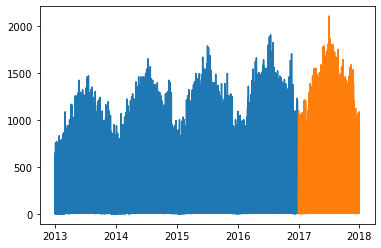

In [12]:
plt.plot(train.index, train.sales_total)
plt.plot(test.index, test.sales_total)

### Only use your train data set to perform the following tasks

3. Resample your data and visualize it.

<AxesSubplot:xlabel='sale_date'>

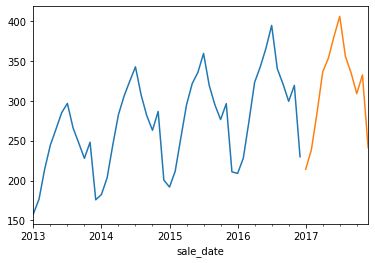

In [37]:
train.resample('M').sales_total.mean().plot()
test.resample('M').sales_total.mean().plot()

4. Creating a rolling (moving) average of your data and visualize it.

<AxesSubplot:xlabel='sale_date'>

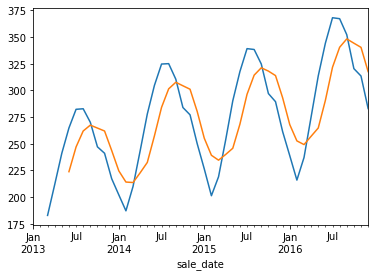

In [15]:
train.resample('M').sales_total.mean().rolling(3).mean().plot()
train.resample('M').sales_total.mean().rolling(6).mean().plot()

5. Plot the difference in sales from one day to the next.

<AxesSubplot:xlabel='sale_date'>

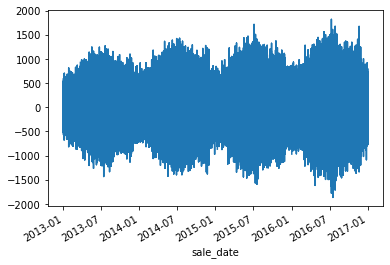

In [38]:
train.resample('D').sales_total.diff().plot()

In [20]:
y = train.resample('D').sales_total.sum()

<AxesSubplot:xlabel='sale_date'>

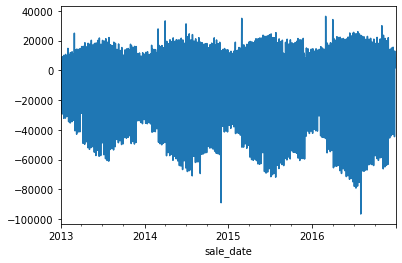

In [21]:
y.diff().plot()

<AxesSubplot:xlabel='sale_date'>

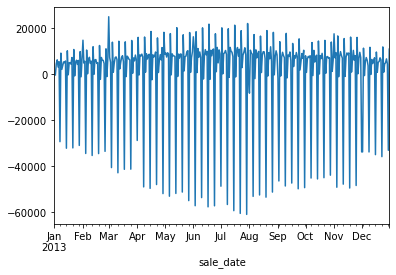

In [39]:
y.diff()['2013'].plot()

6. Plot the % difference in sales from one day to the next.

In [23]:
y2 = train.resample('D').sales_total.mean()

<AxesSubplot:xlabel='sale_date'>

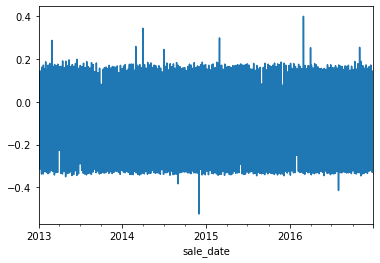

In [27]:
(y2.diff() / y2.shift()).plot()

7. Plot the % difference in sales from one week to the next

In [28]:
y3 = train.resample('W').sales_total.mean()

<AxesSubplot:xlabel='sale_date'>

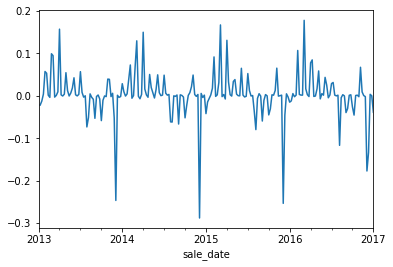

In [29]:
(y3.diff() / y3.shift()).plot()

8. Plot the % difference in sales from one month to the next.

In [30]:
y4 = train.resample('M').sales_total.mean()

<AxesSubplot:xlabel='sale_date'>

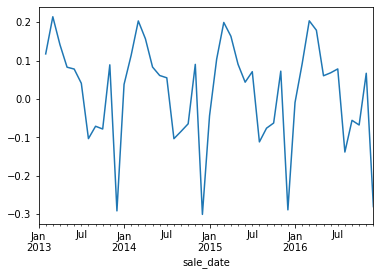

In [31]:
(y4.diff() / y4.shift()).plot()

9. Visualize an autocorrelation plot on a weekly resampling.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

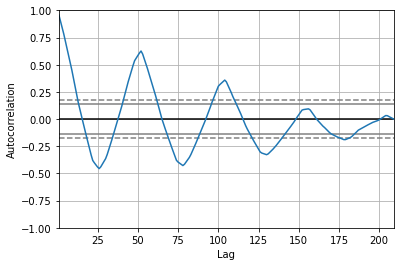

In [33]:
pd.plotting.autocorrelation_plot(y3)

10. Visualize a seasonal decomposition plot on a weekly resampling.

In [34]:
result = sm.tsa.seasonal_decompose(y3)
result

In [35]:
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
sale_date,,,,
2013-01-06,163.589167,NaN,-77.434789,NaN
2013-01-13,159.981203,NaN,-79.225757,NaN
2013-01-20,157.946720,NaN,-79.904284,NaN
2013-01-27,158.545383,NaN,-80.259357,NaN
2013-02-03,167.585014,NaN,-77.352692,NaN


<AxesSubplot:xlabel='sale_date'>

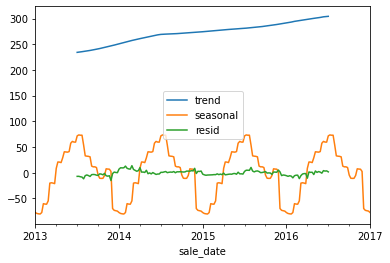

In [36]:
decomposition.iloc[:, 1:].plot()